# 0.0. Imports


In [57]:
# Blibliotecas
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns 
sns.set(rc={'figure.figsize':(20,15)})

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import datetime
from IPython.display import Image


### 0.1 Helper Functions

### 0.2. Loading data

In [2]:
df_sales_raw = pd.read_csv('datasets/train.csv', low_memory=False )
df_store_raw = pd.read_csv('datasets/store.csv', low_memory=False )

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store' )

In [4]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Legenda Colunas


    'Store' - Lojas ativas
    'DayOfWeek' - Dias da semana
    'Date' - Dias
    'Sales' - Vendas
    'Customers' - Clientes por loja
    'Open' - Loja esta aberta ou fechada
    'Promo' - Lojas com promocoes ativas
    'StateHoliday' - Feriados nacionais
    'SchoolHoliday' - Feriados escolares (Ferias escolares)
    'StoreType' - Tipo de loja
    'Assortment' - Sortimento da loja
    'CompetitionDistance' - Distancia das lojas - competidoras
    'CompetitionOpenSinceMonth', - Loja com promocao desde - Mensal
    'CompetitionOpenSinceYear'  - lojas com promocao desde - Anual
    'Promo2' - Lojas com continuacao da PROMO
    'Promo2SinceWeek', - Data da promo2 semanal
    'Promo2SinceYear' - Data da Promo2 Anual
    'PromoInterval - Intervalo de promocoes

# 1.0. Descricao dos dados

In [3]:
df1 = df_raw.copy() #Copia dos dados para DF1

## 1.1. Rename Columns

In [4]:
cols_old = ['Store',
            'DayOfWeek',
            'Date',
            'Sales', 
            'Customers',
            'Open',
            'Promo',
            'StateHoliday',
            'SchoolHoliday',
            'StoreType',
            'Assortment',
            'CompetitionDistance',
            'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear',
            'Promo2',
            'Promo2SinceWeek',
            'Promo2SinceYear',
            'PromoInterval' ]

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

## 1.2. Data dimensions

In [5]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) ) # Numero de linhas
print( 'Number of Cols: {}'.format( df1.shape[1] ) ) # Numero de colunas 

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Data types

In [6]:
df1['date'] = pd.to_datetime( df1['date'] ) # Transformacao do tipo da coluna - No caso 'Date'
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum() # Check isna

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [10]:
#vericar quantas linhas tem a coluna abaxo usando max_value
df1['competition_distance'].max() 

75860.0

# 1.5. Fillout NA

In [7]:
# Removendo NA usando lambda

# competition_distance
df1[ 'competition_distance' ] = df1[ 'competition_distance' ].apply( lambda x: 200000.0 if math.isnan( x ) else x )
# competition_open_since_month
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'], axis=1 )
# competition_open_since_year
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis=1 )
# promo2_since_week             
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week']) else x['promo2_since_week'], axis=1 )
# promo2_since_year         
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year']) else x['promo2_since_year'], axis=1 )
# promo_interval


In [8]:
# Criando uma Coluna Mes, e substituindo NA por 0
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dez'}

df1['promo_interval'].fillna(0, inplace=True ) #Foi substituido NA por 0, nao retornando nenhum valor

df1['month_map'] = df1['date'].dt.month.map( month_map ) #Transforma em data / mes / depois substitui os numeros por letras

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1 )


# 1.6. Change Types

In [9]:
# Modificando o tipo dos dados por colunas
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year' ] = df1['competition_open_since_year' ].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

# 1.7. Descriptive Statistical

In [10]:
## 1.7.1 Numerical Attributes / Selecao de atributos 

num_attributes = df1.select_dtypes(include = ['int64','float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

In [11]:
# Central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T # Desvio padrao
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate

m = pd.concat( [ d2 , d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

In [95]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


# 1.7.2 Categorical Attributes

In [13]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [14]:
cat_attributes.dtypes

state_holiday     object
store_type        object
assortment        object
promo_interval    object
month_map         object
dtype: object

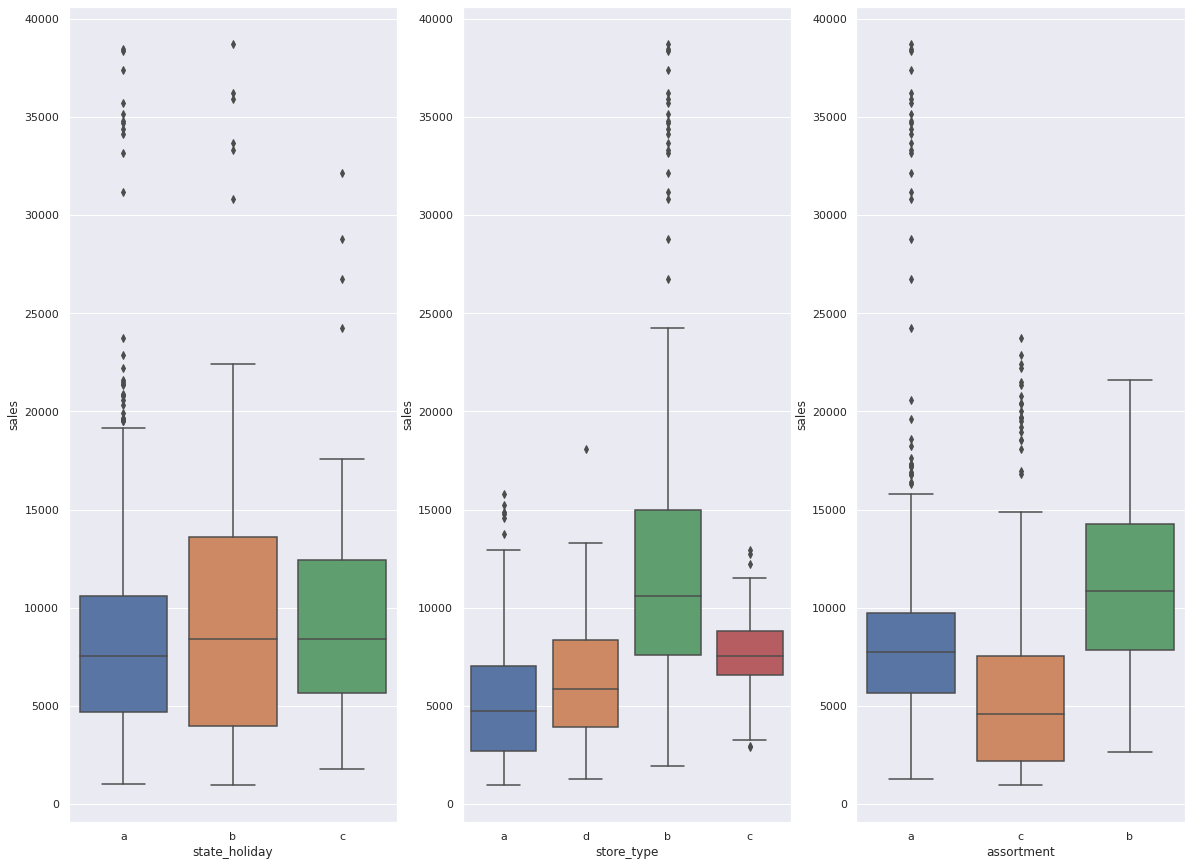

In [15]:
aux1 = df1[(df1['state_holiday'] !='0' ) & (df1['sales'] > 0)]

plt.subplot(1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data = aux1 )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data = aux1 )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data = aux1 )

df1.to_csv('store_sales_prediction')

In [16]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


# 2.0 Feature Engineering

In [17]:
#copy
df2 = df1.copy()
# df2 = pd.read_csv('store_sales_prediction',low_memory=False)

### Mapa mental de Hipotese

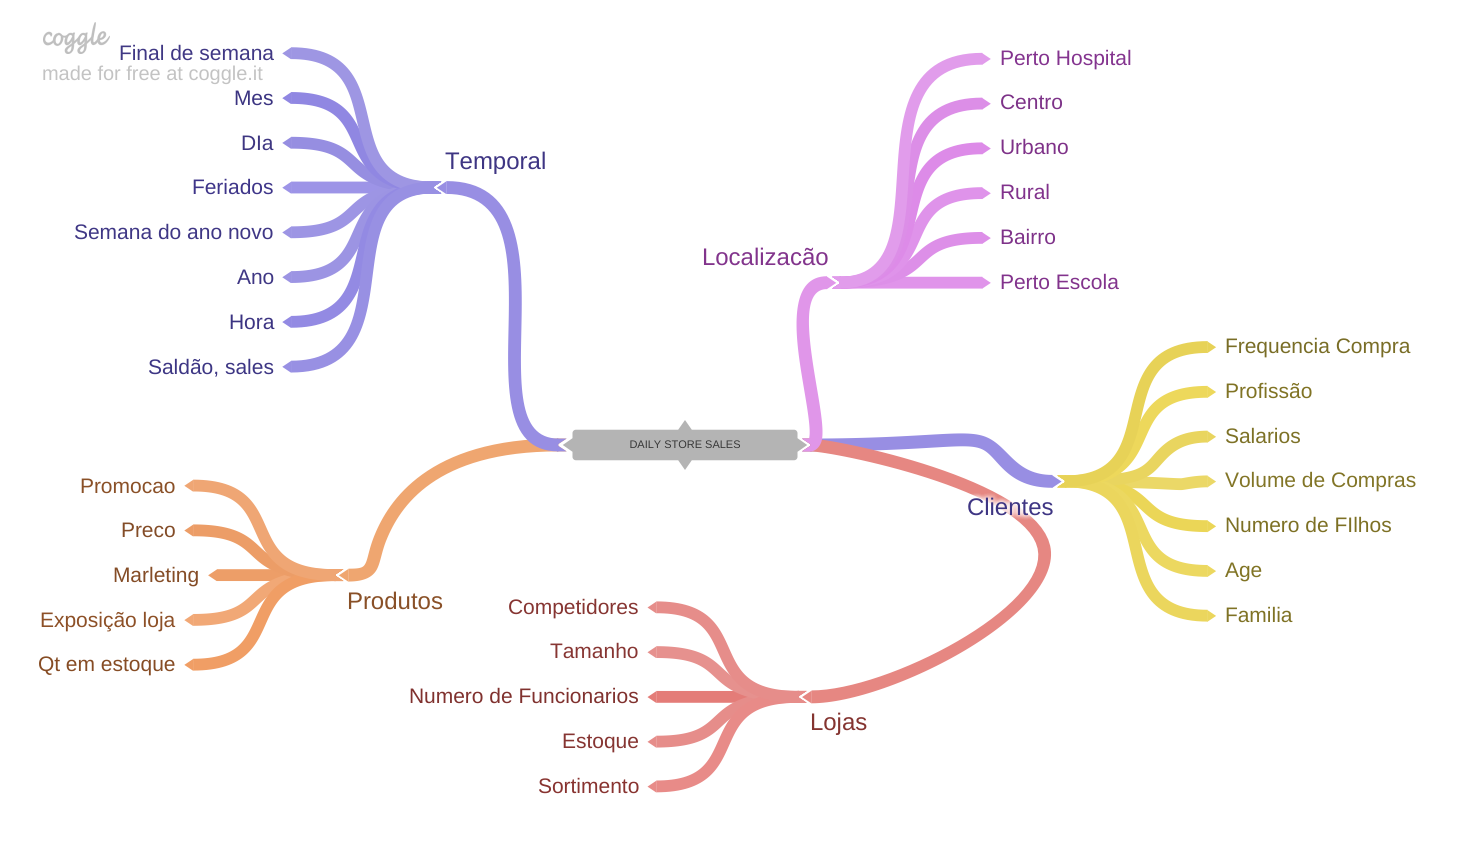

In [26]:
Image('DAILY_STORE_SALES.png')

## 2.1. Criacao das hipotese

### 2.1.1. Hipoteses Loja

**1,** Lojas com maior quadro de funcionarios deveriam vender mais.

**2,** Lojas com maior estoque deveriam vender mais.

**3,** Lojas com maior porte deveriam vender mais.

**4,** Lojas com maior sortimentos deveriam vender mais.

**5,** Lojas com competidores mais proximos deveriam vender menos.

**6,** Lojas com competidores a mais tempo deveriam vender mais.

### 2.1.2. Hipotese Produto

**1,** Lojas que investem mais em Markentig deveriam vender mais.

**2,** Lojas que expoem mais o produto na vitrine deveriam vender mais.

**3,** Lojas que tem precos menores nos produtos deveriam vender mais.

**4,** Lojas que ter precos menores por mais tempo nos produtos deveriam vender mais

**5,** Lojas com promocoes mais agressivas (descontos maiores), deveriam vender mais.

**6,** Lojas com promocoes ativas por mais tempo deveriam vender mais.

**7,** Lojas com mais dias de promocao, deveriam vender mais.

**8,** Lojas com mais promocoes consecutivas deveriam vender mais.

### 2.1.3. Hipotese Tempo (Sazonalidade)

**1,** Lojas abertas durante o feriado de Natal, deveriam vender mais.

**2,** Lojas deveriam vender mais ao longo dos anos.

**3,** Lojas deveriam vender mais no segundo semestre do ano.

**4,** Lojas deveriam vender mais depois do dia 10 de cada mes.

**5,** Lojas deveriam vender menos aos finais de semana.

**6,** Lojas deveriam vender menos durante os feriados escolares.

## 2.2. Lista final de Hipoteses


**1,** Lojas com maior sortimentos deveriam vender mais.

**2,** Lojas com competidores mais proximos deveriam vender menos.

**3,** Lojas com competidores a mais tempo deveriam vender mais.

**4,** Lojas com promocoes ativas por mais tempo deveriam vender mais.

**5,** Lojas com mais dias de promocao, deveriam vender mais.

**6,** Lojas com mais promocoes consecutivas deveriam vender mais.

**7,** Lojas abertas durante o feriado de Natal, deveriam vender mais.

**8,** Lojas deveriam vender mais ao longo dos anos.

**9,** Lojas deveriam vender mais no segundo semestre do ano.

**10,** Lojas deveriam vender mais depois do dia 10 de cada mes.

**11,** Lojas deveriam vender menos aos finais de semana.

**12,** Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Feature Engineering

In [18]:
#year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# week year
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )


# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30).apply( lambda x: x.days ).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = (( df2['date'] - df2['promo_since']) /7).apply( lambda x: x.days ).astype( int )

# assortment
# a = basic, b = extra, c = extended
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
# a = public_holiday, b = easter_holiday, c = christmas
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [19]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0. Filtragem de variaveis

In [20]:
df3 = df2.copy()

In [21]:
df3.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


## 3.1. Filtragem das linhas

In [22]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2. Selecao das colunas


In [23]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis=1 )

In [24]:
df3.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


# 4.0. Passo 4 - Analise exploratoria dos dados

In [25]:
df4 = df3.copy()

## 4.1. Analise Univariada

### 4.1.1. Response Variable

/home/clever/anaconda3/envs/ds_producao/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

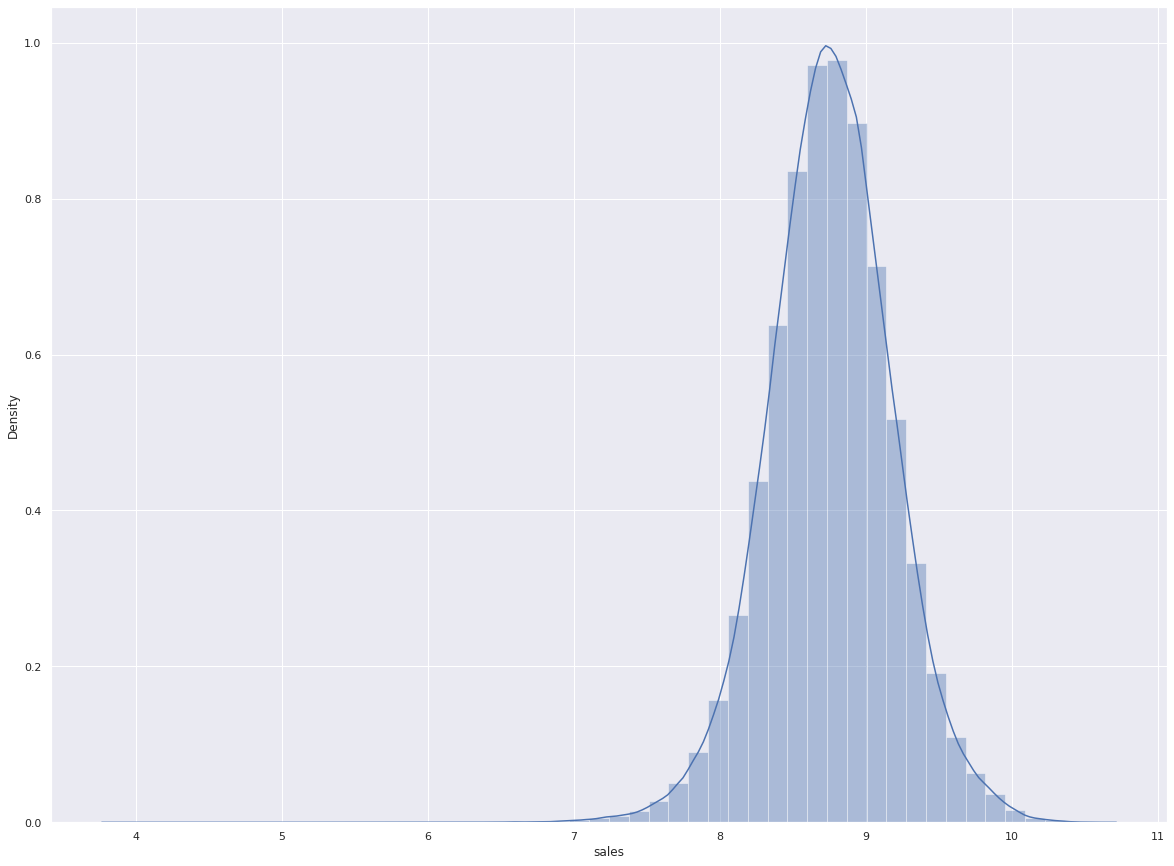

In [26]:
sns.distplot(np.log1p( df4['sales']))
# sns.distplot( df4['sales'])

### 4.1.2. Numerical Variable

array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'customers'}>],
       [<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'promo'}>,
        <AxesSubplot:title={'center':'school_holiday'}>,
        <AxesSubplot:title={'center':'competition_distance'}>],
       [<AxesSubplot:title={'center':'competition_open_since_month'}>,
        <AxesSubplot:title={'center':'competition_open_since_year'}>,
        <AxesSubplot:title={'center':'promo2'}>,
        <AxesSubplot:title={'center':'promo2_since_week'}>],
       [<AxesSubplot:title={'center':'promo2_since_year'}>,
        <AxesSubplot:title={'center':'is_promo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

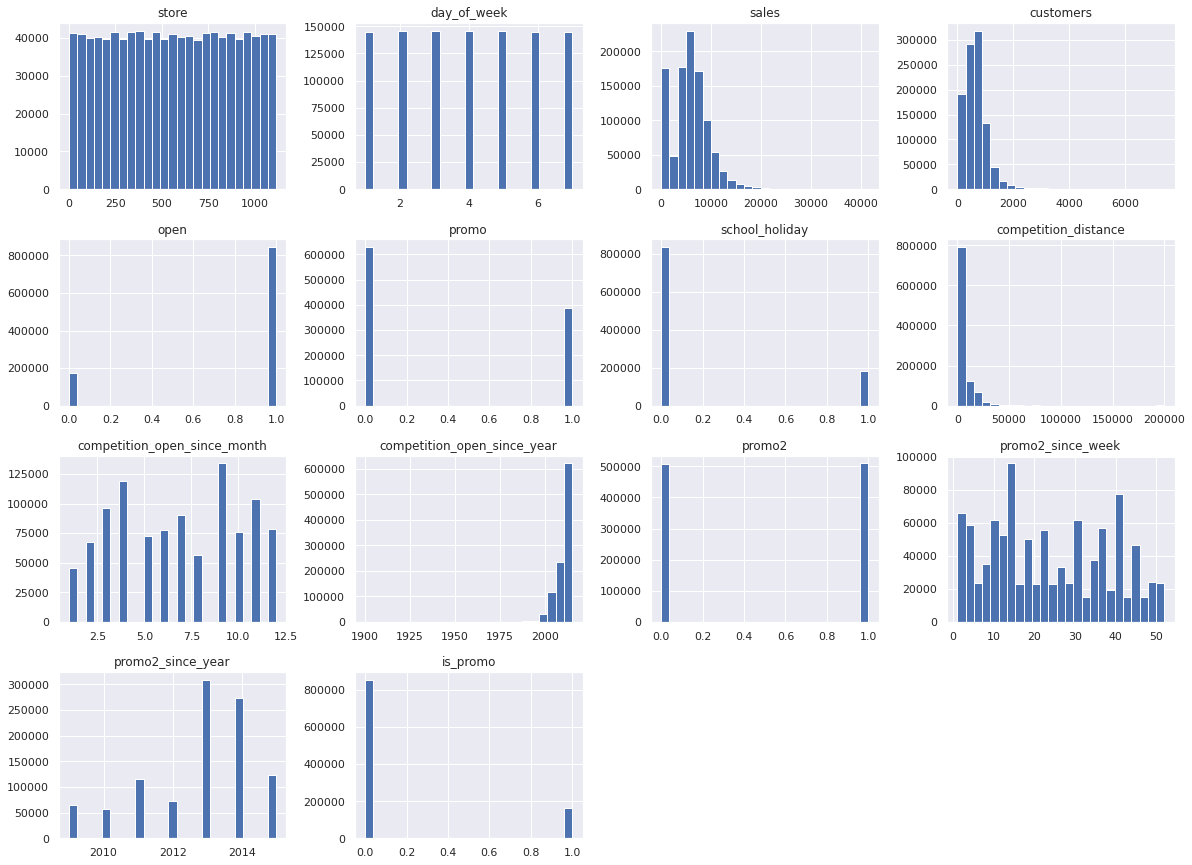

In [27]:
num_attributes.hist( bins=25 )

### 4.1.3. Categorical Variable

In [28]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

/home/clever/anaconda3/envs/ds_producao/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/clever/anaconda3/envs/ds_producao/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/clever/anaconda3/envs/ds_producao/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

<AxesSubplot:xlabel='sales', ylabel='Density'>

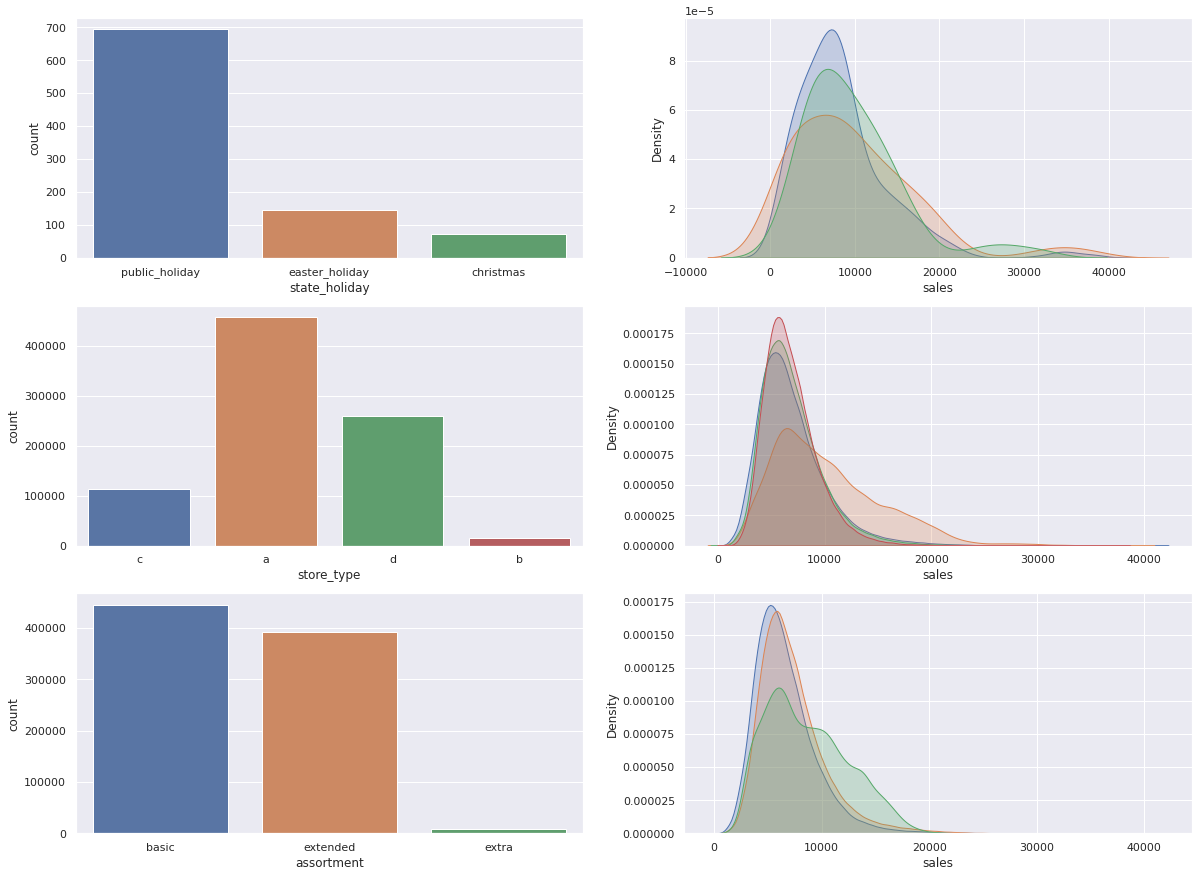

In [29]:
# state_holiday
plt.subplot( 3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'] )

plt.subplot( 3, 2, 2)
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas'     ]['sales'], label='christmas'     , shade=True )
# store_type
plt.subplot( 3, 2, 3)
sns.countplot( df4['store_type'] )

plt.subplot( 3, 2, 4)
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', shade=True )

# assortment
plt.subplot( 3, 2, 5)
sns.countplot( df4['assortment'] )

plt.subplot( 3, 2, 6)
sns.kdeplot( df4[df4['assortment'] == 'basic'   ]['sales'], label='basic'   , shade=True )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', shade=True )
sns.kdeplot( df4[df4['assortment'] == 'extra'   ]['sales'], label='extra'   , shade=True )

## 4.2. Analise Bivariada

### H1. Lojas com maior sortimentos deveriam vender mais.
* FALSA Lojas com MAIOR SORTIMENTO vendem MENOS.



<AxesSubplot:xlabel='year_week'>

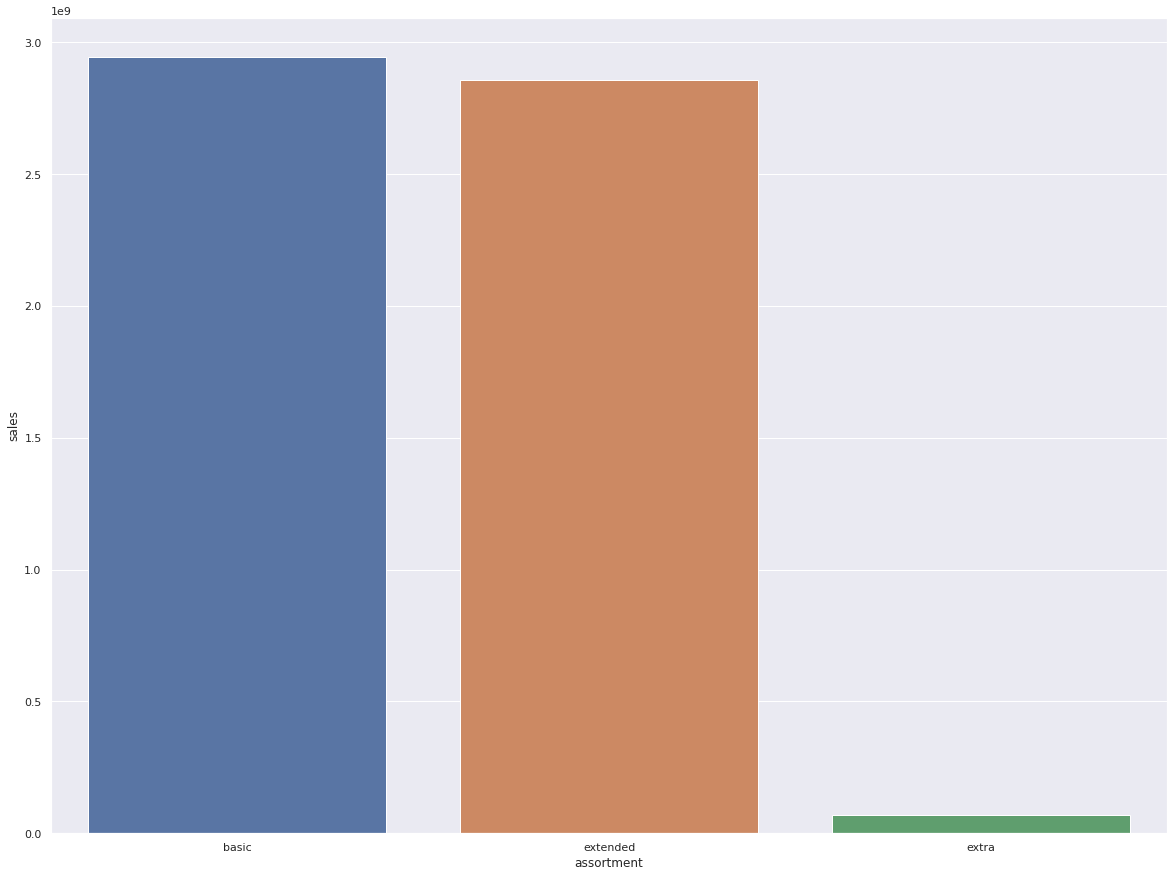

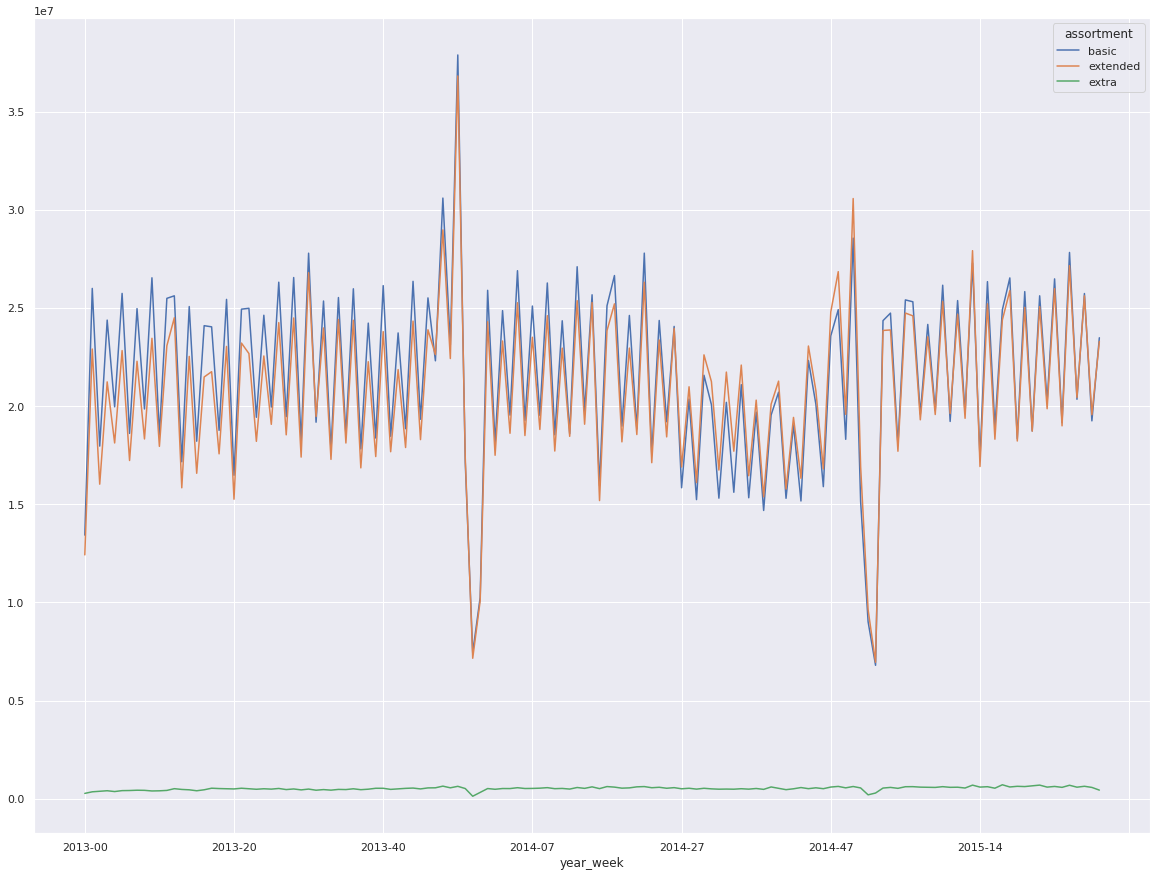

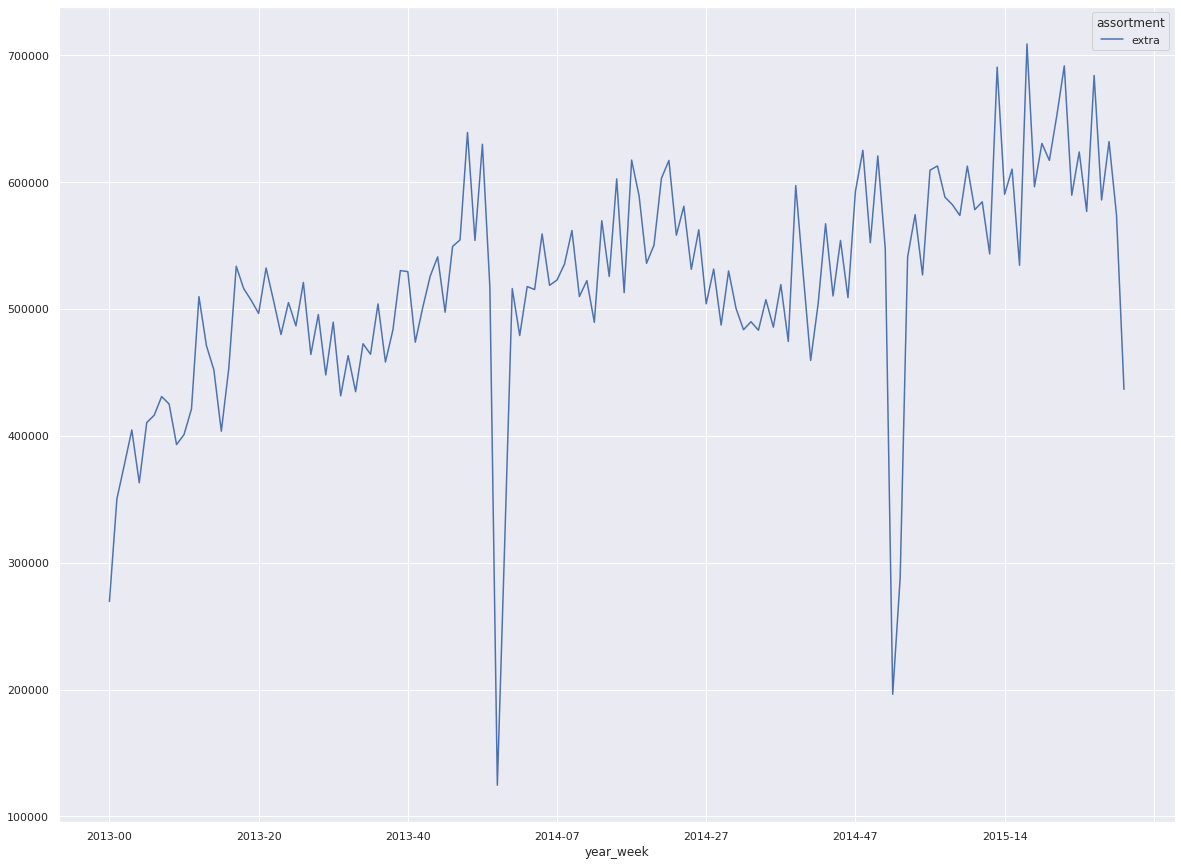

In [31]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );

aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot( index ='year_week' , columns ='assortment' , values ='sales').plot()

aux3 = aux2[ aux2[ 'assortment' ] == 'extra']
aux3.pivot( index ='year_week' , columns ='assortment' , values ='sales').plot()


### H2. Lojas com competidores mais proximos deveriam vender menos.
* Falsa - Lojas com COMPETIDORES MAIS PROXIMOS vendem MAIS.

<AxesSubplot:>

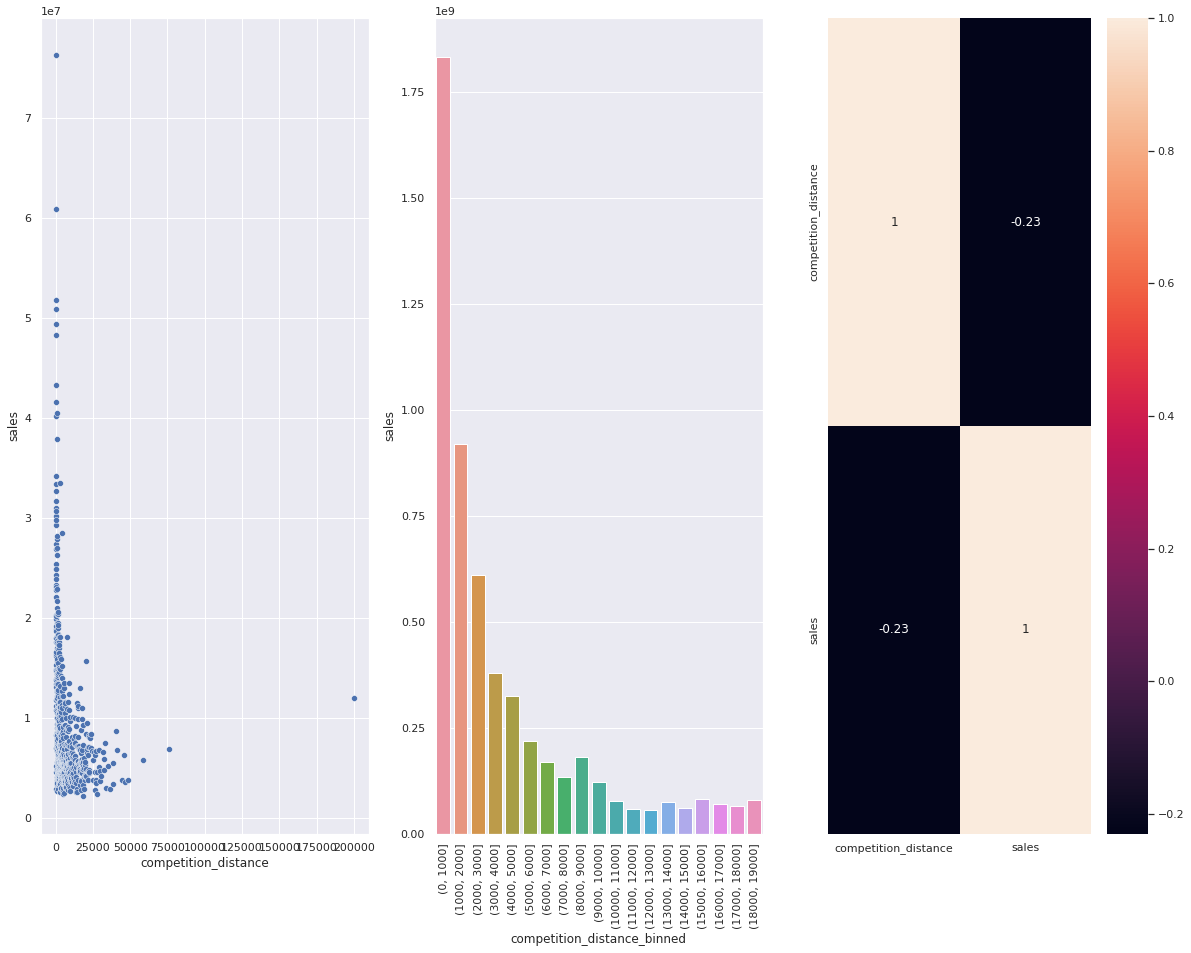

In [32]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.scatterplot( x = 'competition_distance', y = 'sales', data = aux1 );

plt.subplot( 1, 3, 2 )
bins = list( np.arange( 0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut( aux1[ 'competition_distance' ], bins = bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot( x = 'competition_distance_binned' , y = 'sales' , data = aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method= 'pearson' ), annot=True )

### H3. Lojas com competidores a mais tempo deveriam vender mais.
* False * Lojas com COMPETIDORES a mais tempo VENDEM MENOS

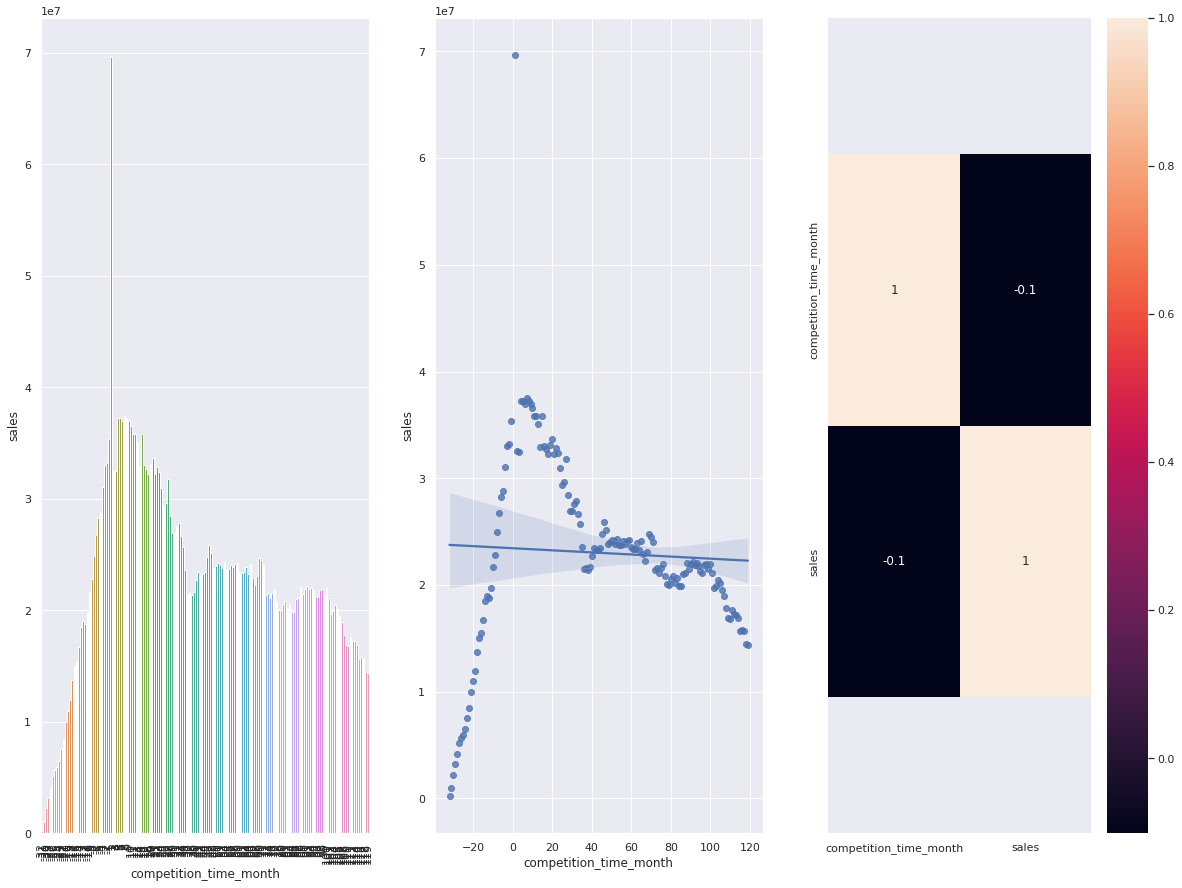

In [35]:
plt.subplot(1, 3, 1)
aux1 = df4[[ 'competition_time_month', 'sales' ]].groupby( 'competition_time_month' ).sum().reset_index()
aux2 = aux1[( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 )]
sns.barplot( x = 'competition_time_month', y = 'sales', data = aux2 );
plt.xticks( rotation = 90 );

plt.subplot(1, 3, 2)
sns.regplot( x = 'competition_time_month', y = 'sales', data = aux2 );

plt.subplot(1, 3, 3)
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

### H4. Lojas com promocoes ativas por mais tempo deveriam vender mais.
    * Falsa ** Lojas com promocoes ativas por mais tempo VENDE MENOS, depois de certo periodo de promocoes


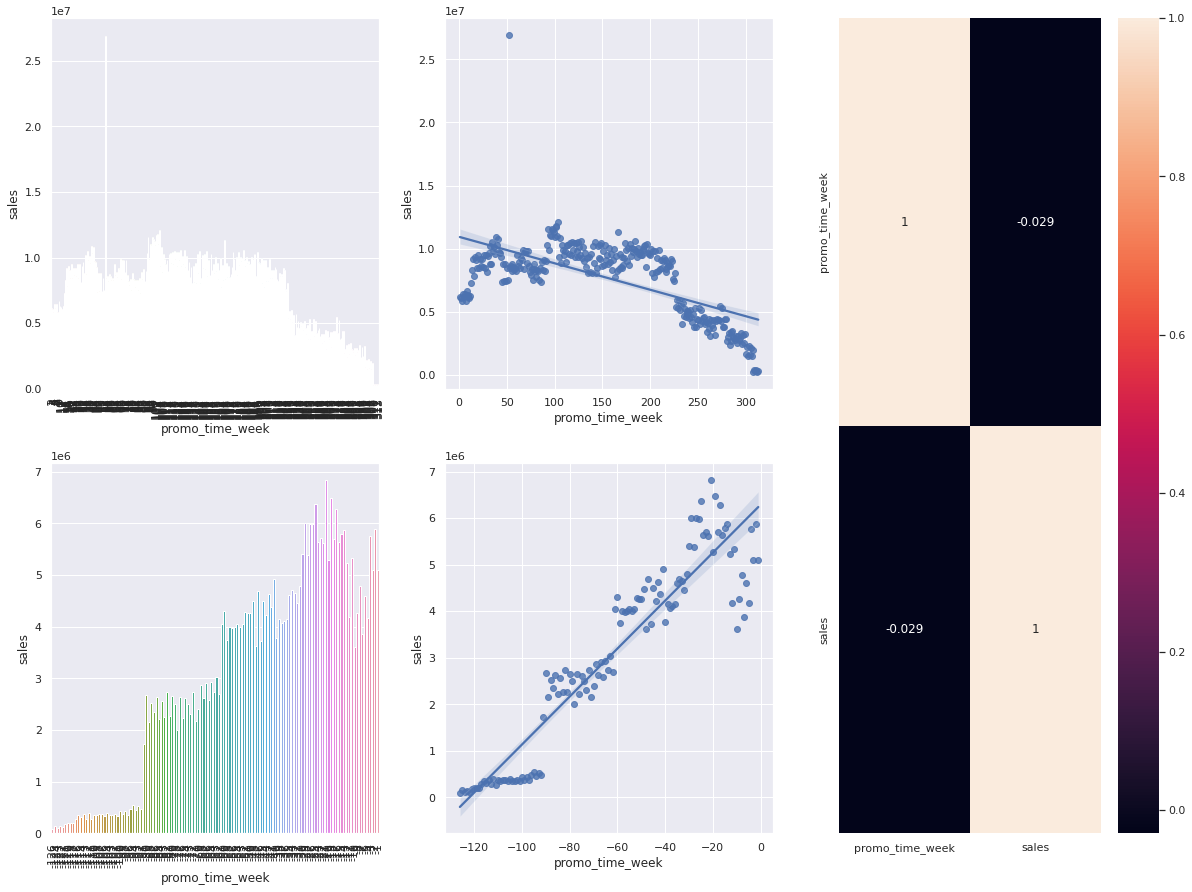

In [60]:
aux1 = df4[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

grid = GridSpec(2, 3)

plt.subplot( grid[0, 0] )
aux2 = aux1[aux1['promo_time_week'] > 0 ] #Promo extendido
sns.barplot( x = 'promo_time_week', y = 'sales', data = aux2 );
plt.xticks( rotation = 90 );

plt.subplot( grid[0,1] )
sns.regplot( x = 'promo_time_week', y = 'sales', data = aux2 );


plt.subplot( grid[1, 0] )
aux3 = aux1[aux1['promo_time_week'] < 0 ] #Promo regular
sns.barplot( x = 'promo_time_week', y = 'sales', data = aux3);
plt.xticks( rotation = 90 );

plt.subplot( grid[1, 1])
sns.regplot( x = 'promo_time_week', y = 'sales', data = aux3 );

plt.subplot( grid[:,2])
sns.heatmap( aux1.corr( method='pearson' ), annot=True );



### <s> H5. Lojas com mais dias de promocao, deveriam vender mais.</s>


### H6. Lojas com mais promocoes consecutivas deveriam vender mais.
* Falsa ** Lojas com mais promocoes consecutivas vendem menos

In [71]:
# H6
df4[['promo', 'promo2', 'sales']].groupby( ['promo', 'promo2'] ).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


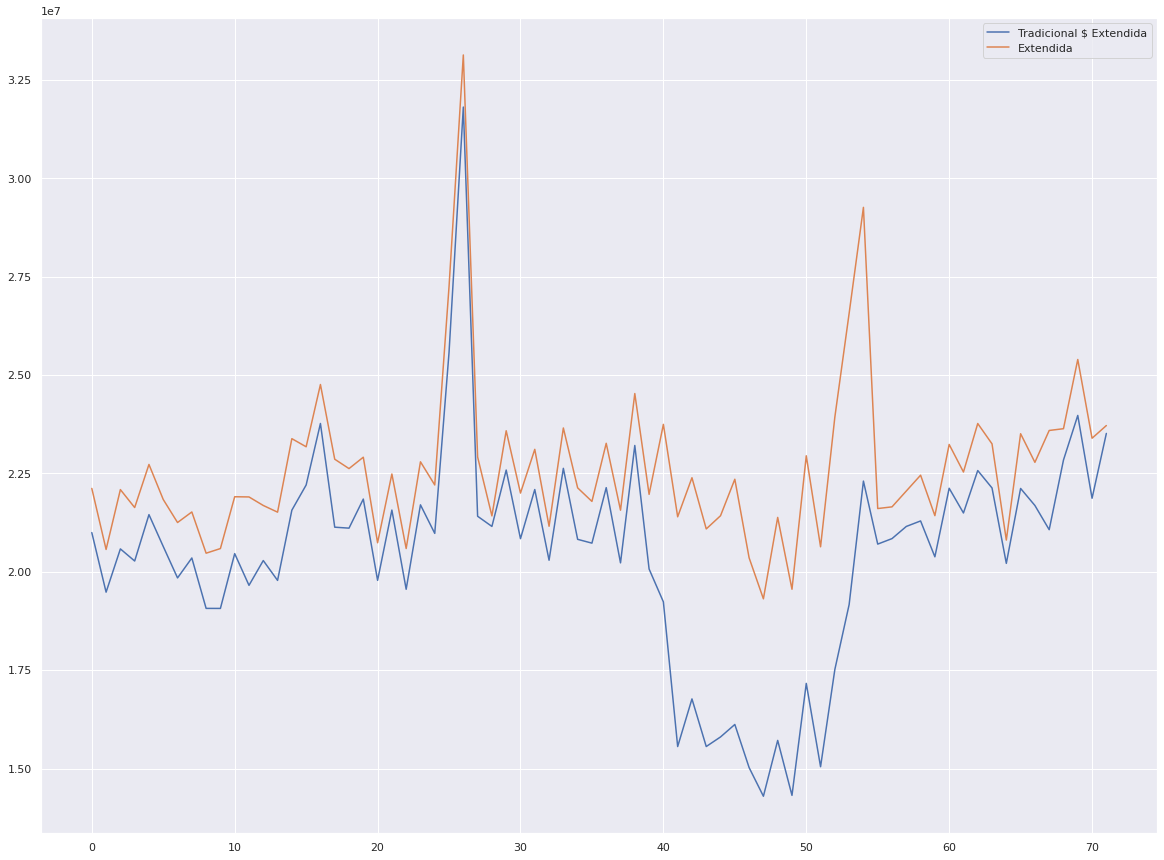

In [100]:
aux1 = df4[( df4[ 'promo' ] == 1 ) & ( df4[ 'promo2' ] == 1 )][[ 'year_week', 'sales' ]].groupby('year_week').sum().reset_index()
ax = aux1.plot()

# plt.subplot( 2, 1, 2 )
aux2 = df4[( df4[ 'promo' ] == 1 ) & ( df4[ 'promo2' ] == 0 )][[ 'year_week', 'sales' ]].groupby('year_week').sum().reset_index()
aux2.plot( ax = ax )

ax.legend( labels=['Tradicional $ Extendida', 'Extendida']);

### H7. Lojas abertas durante o feriado de Natal, deveriam vender mais.
** Falsa * Lojas abertada durante o Natal VENDEM MENOS


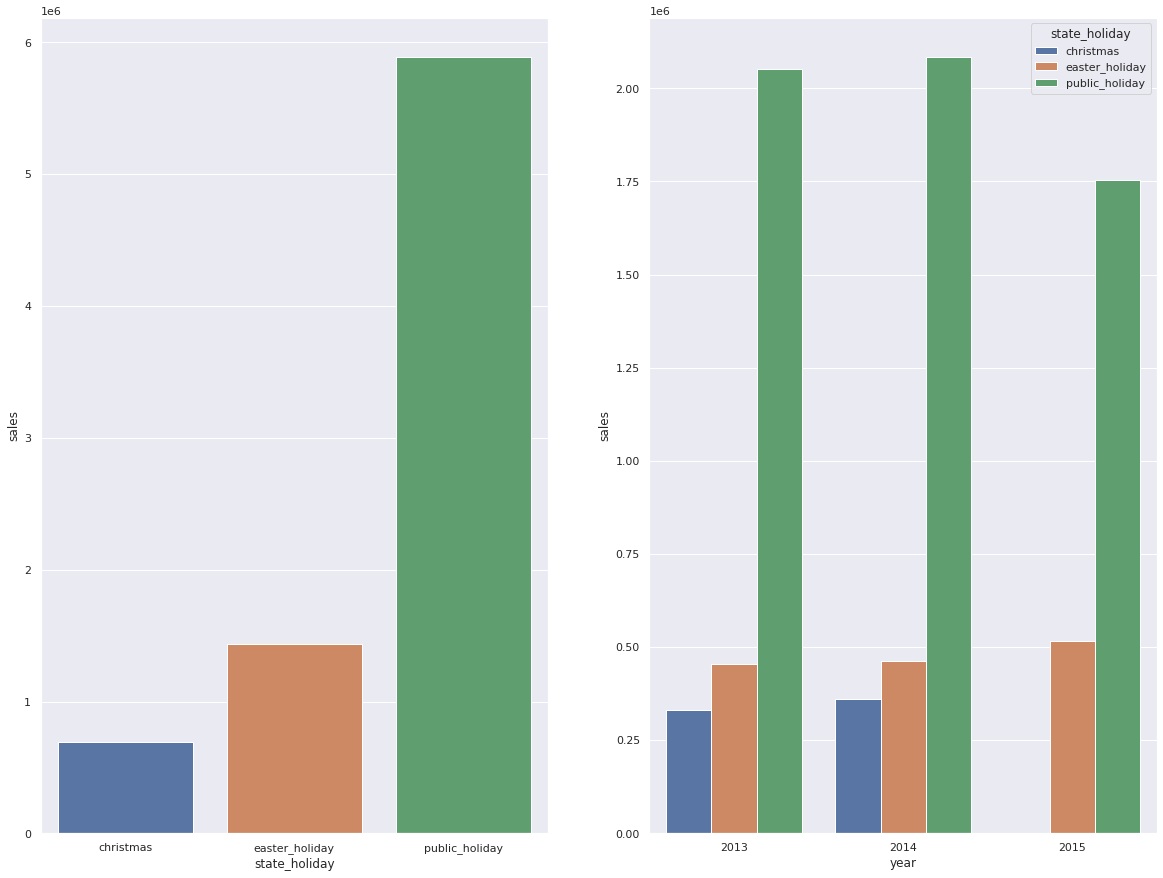

In [109]:
aux = df4[df4[ 'state_holiday' ] != 'regular_day' ]

plt.subplot(1, 2, 1)
aux1 = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()
sns.barplot( x = 'state_holiday', y = 'sales', data = aux1);

plt.subplot(1, 2, 2)
aux2 = aux[['year', 'state_holiday', 'sales']].groupby( ['year', 'state_holiday'] ).sum().reset_index()
sns.barplot( x = 'year', y = 'sales', hue = 'state_holiday', data = aux2 );

In [101]:
aux1.head()

,year_week,sales
0,2013-01,20995409
1,2013-03,19481514
2,2013-05,20580811
3,2013-07,20273185
4,2013-09,21451952


### H8. Lojas deveriam vender mais ao longo dos anos.
* Falsa - Lojas vendem menos ao longo dos anos


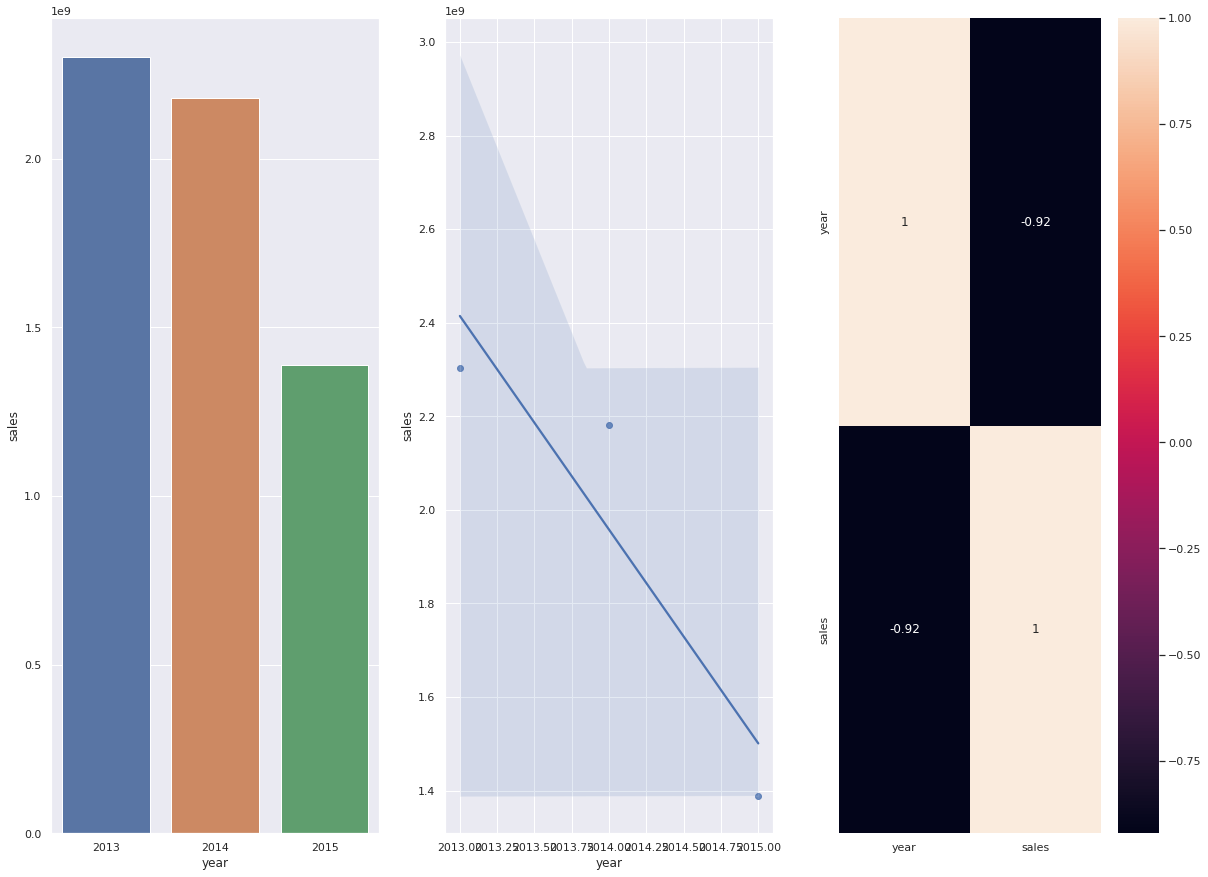

In [118]:
aux1 = df4[[ 'year', 'sales' ]].groupby( 'year' ).sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x = 'year', y = 'sales', data = aux1 );

plt.subplot(1, 3, 2)
sns.regplot( x = 'year', y = 'sales', data = aux1 );

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ),annot=True );




### H9. Lojas deveriam vender mais no segundo semestre do ano.
** Falsa ** Lojas vendem MENOS no segundo semestre do ano.


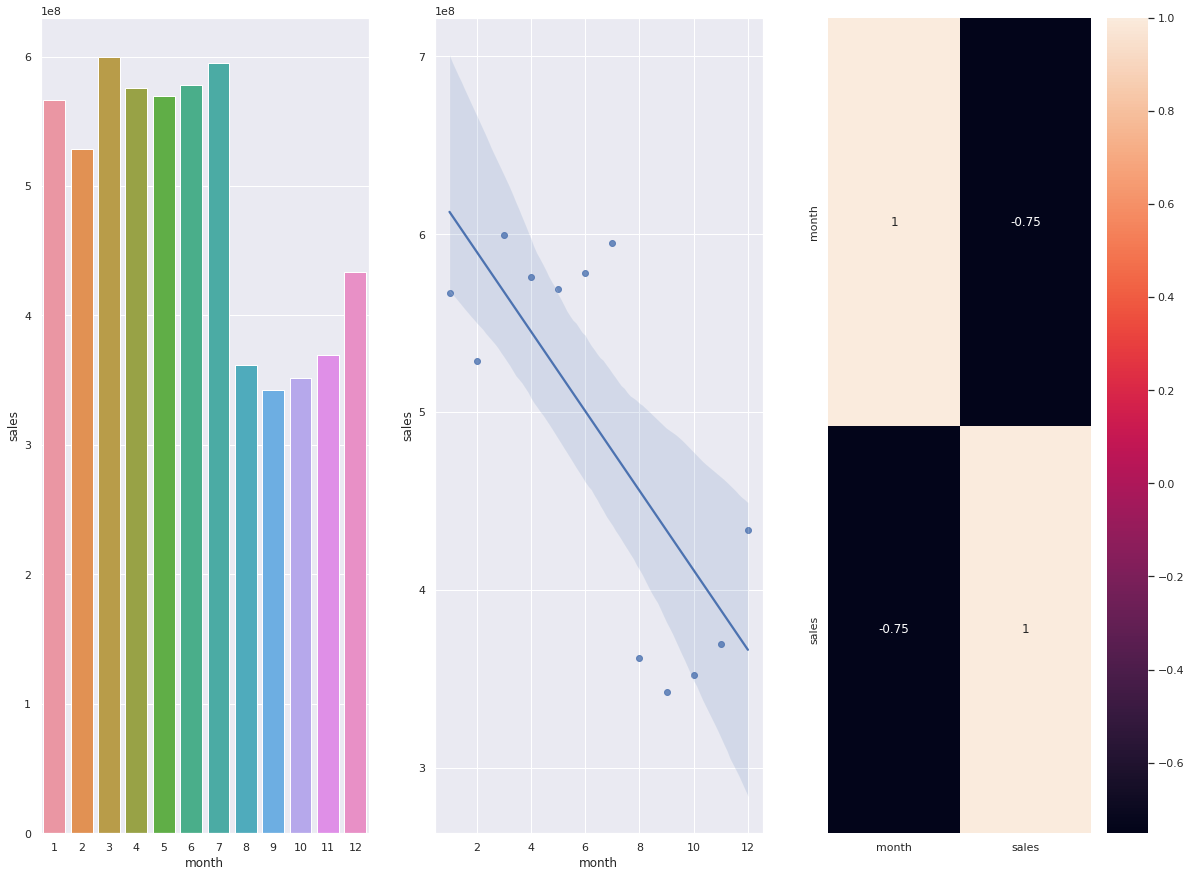

In [119]:
aux1 = df4[[ 'month', 'sales' ]].groupby( 'month' ).sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x = 'month', y = 'sales', data = aux1 );

plt.subplot(1, 3, 2)
sns.regplot( x = 'month', y = 'sales', data = aux1 );

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ),annot=True );

### H10. Lojas deveriam vender mais depois do dia 10 de cada mes.
* Verdadeira ** Lojas vendem MAIS depois do dia 10



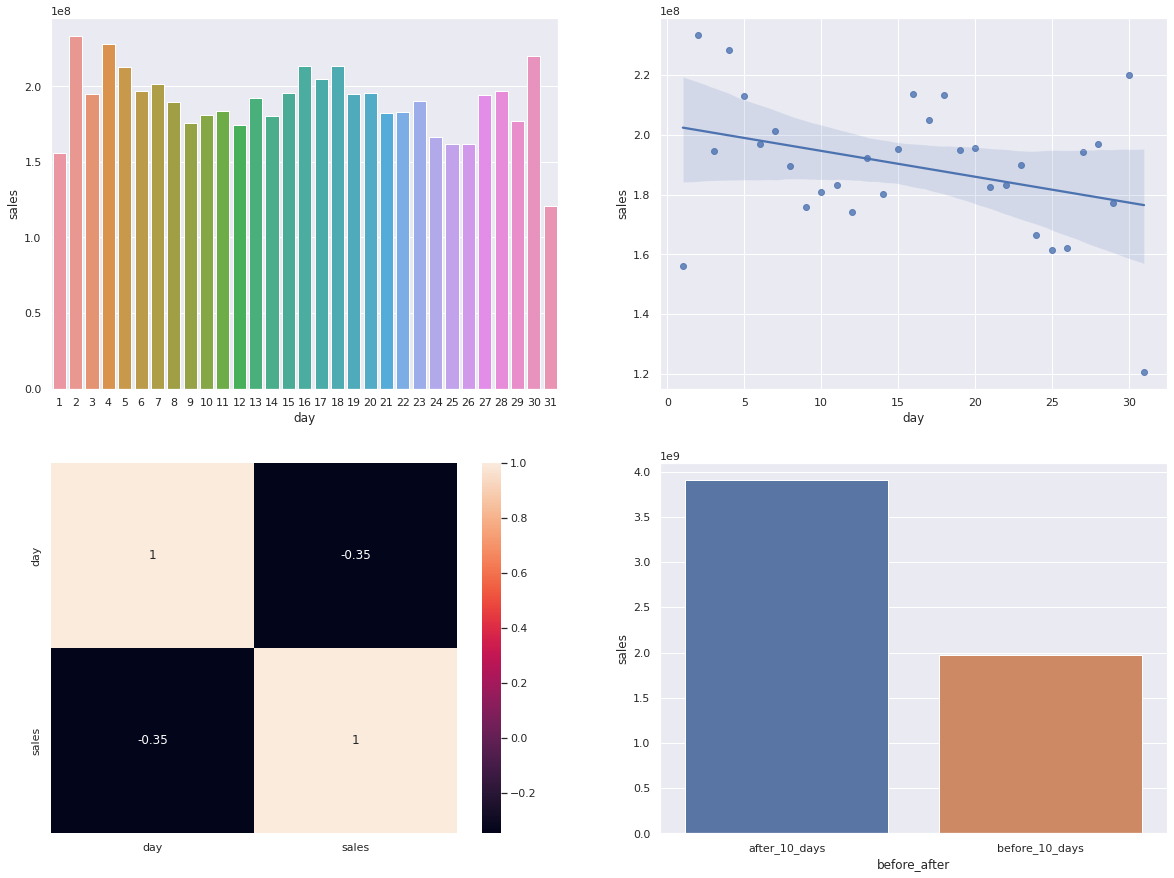

In [126]:
aux1 = df4[[ 'day', 'sales' ]].groupby( 'day' ).sum().reset_index()

plt.subplot(2, 2, 1)
sns.barplot( x = 'day', y = 'sales', data = aux1 );

plt.subplot(2, 2, 2)
sns.regplot( x = 'day', y = 'sales', data = aux1 );

plt.subplot(2, 2, 3)
sns.heatmap( aux1.corr( method='pearson' ),annot=True );

aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after', 'sales']].groupby( 'before_after' ).sum().reset_index()

plt.subplot(2, 2, 4)
sns.barplot( x = 'before_after', y = 'sales', data = aux2 );

### H11. Lojas deveriam vender menos aos finais de semana.
* Verdadeira ** Lojas vendem MENOS nos finais de semana


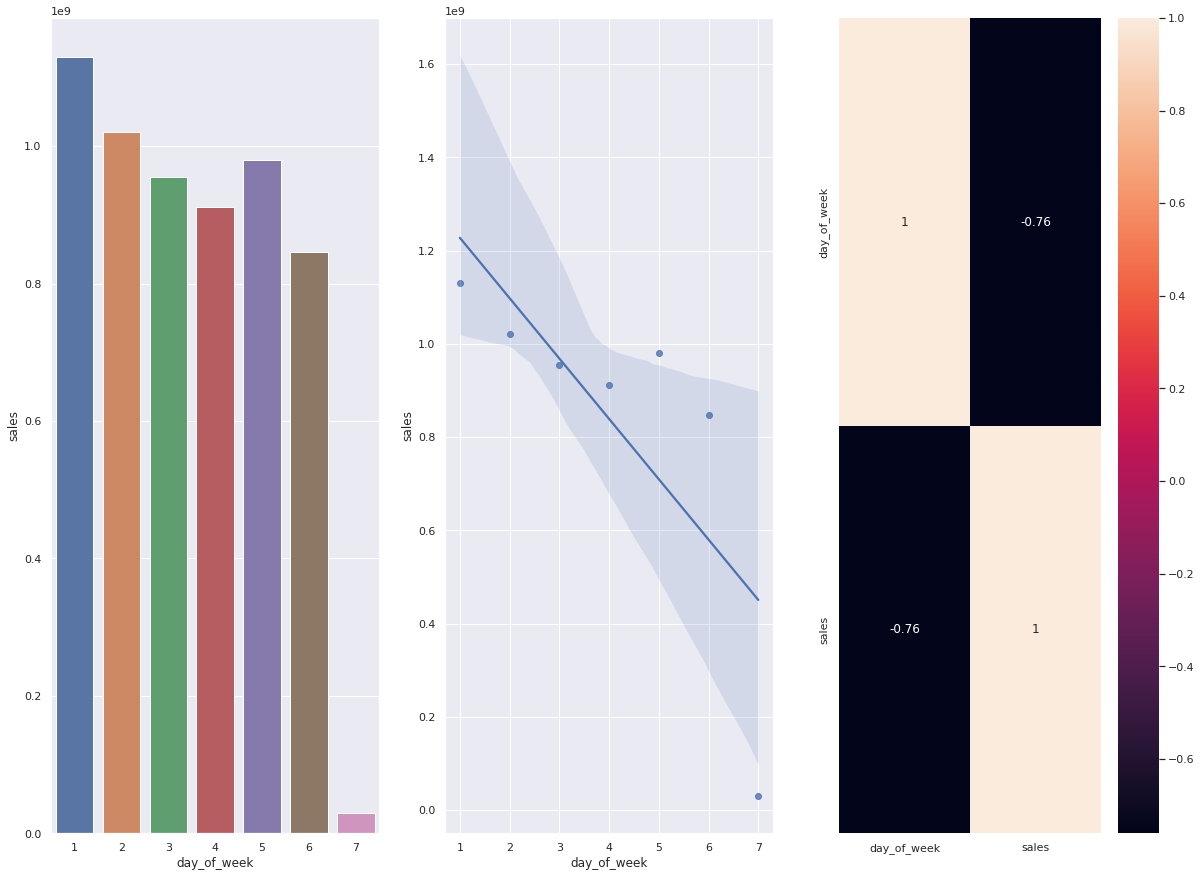

In [128]:
aux1 = df4[[ 'day_of_week', 'sales' ]].groupby( 'day_of_week' ).sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x = 'day_of_week', y = 'sales', data = aux1 );

plt.subplot(1, 3, 2)
sns.regplot( x = 'day_of_week', y = 'sales', data = aux1 );

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ),annot=True );

### H12. Lojas deveriam vender menos durante os feriados escolares.
* Verdadeira ** As Lojas vendem MENOS durante os feriados escolares, excepet os meses de Julho e Agosto.

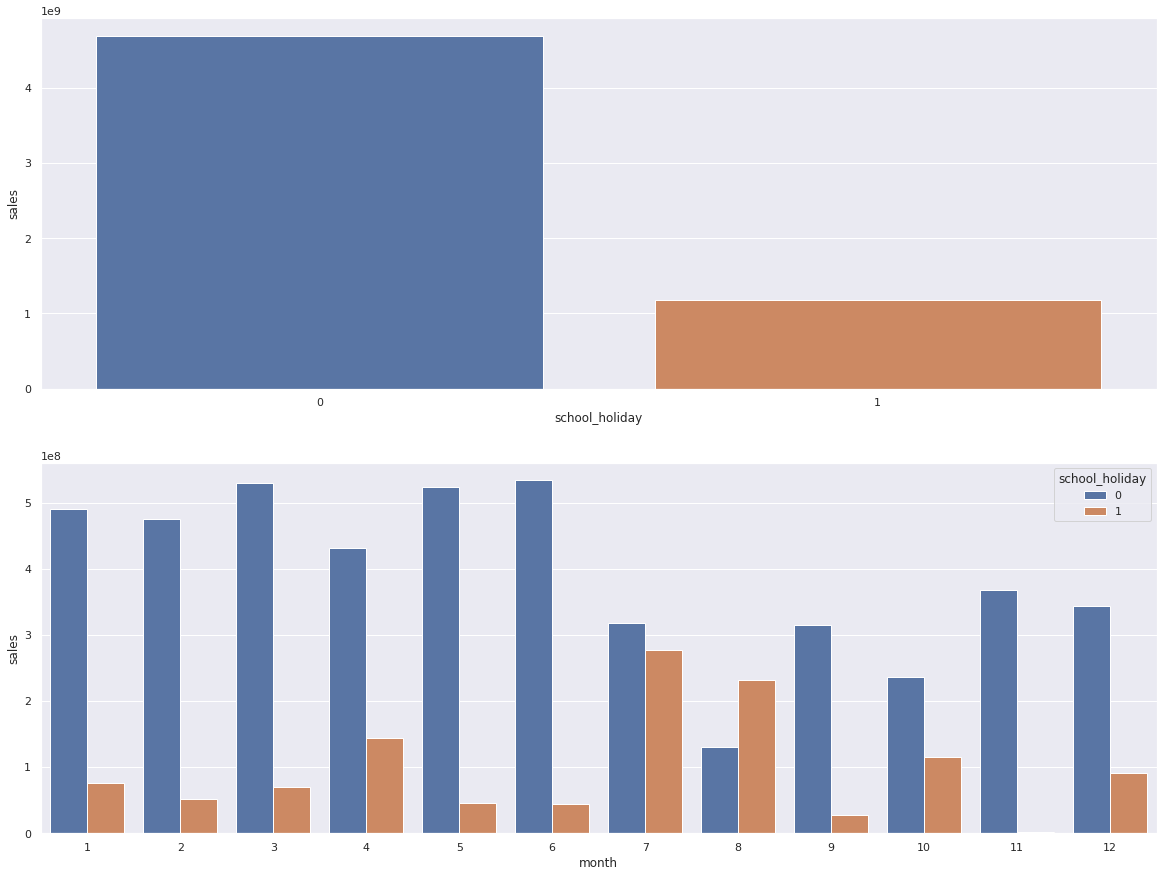

In [134]:
aux1 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()
plt.subplot(2, 1, 1)
sns.barplot( x = 'school_holiday', y = 'sales', data = aux1);

aux2 = df4[['month', 'school_holiday', 'sales']].groupby([ 'month', 'school_holiday']).sum().reset_index()
plt.subplot(2, 1, 2)
sns.barplot( x = 'month', y = 'sales', hue='school_holiday', data = aux2);

## 4.3. Analise Multivariada
